# 天气预测

> json
- json.load(weather_file)  读取文件，文件用load，转成字典
- dump存成文件
- json.loads(dark_response.text)  读取字符串，转成字典
- json.dumps(temperature)   转化成字符串

>

In [3]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

#### 已经有json文件

In [4]:
weather_file=open("sample.json", encoding='utf-8')  ##打开文件
weather_data=json.load(weather_file)##读取文件，文件用load，转成字典
weather_file.close()

In [6]:
print(weather_data["daily"]["data"][7]["temperatureMin"])  ##第几天
print(weather_data["daily"]["data"][0]["temperatureMax"])
print(weather_data["daily"]["data"][0]["humidity"])
print(weather_data["daily"]["data"][0]["summary"])

35.36
40.64
0.76
Light snow in the morning.


#### 根据API从网站获取数据

In [7]:
dark_url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % ("62bf94de3c232f30f6f3ee5bb534c2f3",##api
                                                                    31.2300, 121.4700) 
dark_response = requests.get(dark_url)
dark_data=json.loads(dark_response.text)

In [8]:
print(weather_data["daily"]["data"][7]["temperatureMin"])  ##第几天
print(weather_data["daily"]["data"][0]["temperatureMax"])
print(weather_data["daily"]["data"][0]["humidity"])
print(weather_data["daily"]["data"][0]["summary"])

35.36
40.64
0.76
Light snow in the morning.


#### 写成函数

In [12]:
##文件
def load_json_sample(path):
    with open(path, encoding='utf-8') as json_file:
        return json.load(json_file)
##API  
def request_data():
    # LA 37.8267,-122.4233 , beijing 39.904200, 116.407396
    lat = 39.904200       ##纬度
    long = 116.407396  ##经度
    api_key = "62bf94de3c232f30f6f3ee5bb534c2f3"
    url = "https://api.darksky.net/forecast/%s/%s,%s?units=si" % (api_key, lat, long)
    response = requests.get(url)
    return json.loads(response.text)

##放在一起

def get_daily_data(remote=False):
    if remote:
        json_obj = request_data()     ##网上
    else:
        json_obj = load_json_sample('sample.json')  ##本地文件读取
#    pretty_print_dict_of_list(json_obj)
    attributes = ['temperatureMin', 'temperatureMax', 'humidity','summary']
    daily_data = daily_data_of_attributes(json_obj, attributes)
    return daily_data

##整理数据
def daily_data_of_attributes(json_dict, attributes):
    daily_attributes = {}
    for attr in attributes:
        daily_attributes[attr] = []
    daily_data = json_dict["daily"]["data"]
    try:
        for dict_data in daily_data:
            for attr in attributes:
                daily_attributes[attr].append(dict_data[attr])
    except KeyError:
        print("Key Not Found")
        return {}
    return daily_attributes
##七天的
def pretty_print_dict_of_list(d):
    indent = 4
    print("{")
    for k, l in d.items():
        print(indent * " " + k + ": ", end="")
        print(l)
    print("}")

In [13]:
daily_data = get_daily_data(True)
pretty_print_dict_of_list(daily_data)

{
    temperatureMin: [20.31, 20.61, 20.82, 20.47, 19.13, 19.21, 23.51, 27.05]
    temperatureMax: [37.63, 34.13, 32.65, 35.32, 32.91, 37.14, 36.45, 37.05]
    humidity: [0.43, 0.43, 0.55, 0.44, 0.46, 0.38, 0.29, 0.28]
    summary: ['Rain in the morning.', 'Overcast throughout the day.', 'Partly cloudy throughout the day.', 'Clear throughout the day.', 'Rain in the evening and overnight.', 'Clear throughout the day.', 'Overcast throughout the day.', 'Partly cloudy throughout the day.']
}


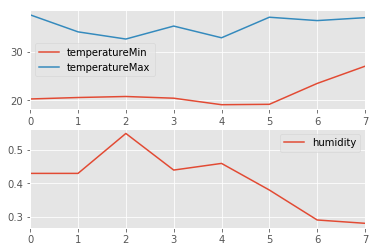

In [15]:
##画图
df = pd.DataFrame(daily_data)
df_temperature = df[["temperatureMin", "temperatureMax"]]
df_humidity = df[["humidity"]]
# Plot data
plt.style.use('ggplot')
_, axes = plt.subplots(nrows=2)
df_temperature.plot(ax=axes[0])
df_humidity.plot(ax=axes[1])
plt.show()